In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
from add_watermark import modify_red_to_green

pic = np.array([list(range(256)) for _ in range(256)], dtype=np.uint8)
pic_mark = np.array(modify_red_to_green(pic,k=30),dtype=np.uint8)
img = Image.fromarray(pic, mode='L')
img_mark = Image.fromarray(pic_mark, mode='L')
display(img)
display(img_mark)

In [ ]:
img.save(f"img_compressed_quality.jpg", "JPEG", quality=50)
img_mark.save(f'img_mark.jpg', "JPEG", quality=50)
img_com = Image.open("img_compressed_quality.jpg")
img_mark_com = Image.open("img_mark.jpg")
# display(img_com)
display(img_mark)
display(img_mark_com)
img_com_np = np.array(img_com)
img_mark_com_np = np.array(img_mark_com)
print(img_com_np[0])
print("=" * 30)
print(pic_mark[0])
print("=" * 30)
print(img_mark_com_np[0])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from utils import distribution_visualize

# 生成两组随机数据
data1 = np.random.randint(0, 256, size=(1000,))
data2 = np.arange(0, 256)
distribution_visualize(data2, 5)

In [ ]:
from add_watermark import modify_red_to_green
import numpy as np

x = np.arange(-20, 20)
y = modify_red_to_green(x, k=5)
for i in range(len(x)):
    print(f"{x[i]} -> {y[i]}")

In [ ]:
print(3.2//2)

In [ ]:
from add_watermark import add_wm_FFT, modify_red_to_green
import torch

a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]],dtype=torch.float32)
b = torch.tensor([[2, 3, 4], [5, 6, 7], [8, 9, 10]],dtype=torch.float32)

c = torch.view_as_complex(torch.stack([a, b], dim=-1))
d = a + 1j * b
# print(c)
# print(d)
d = add_wm_FFT(a)
print(d)
# a = modify_red_to_green(a)
# d = a + 1j * b
# print(d)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个简单的二维数组（例如 5x5 的矩形）
data = np.array([
    [1, 2, 3, 2, 1],
    [2, 4, 6, 4, 2],
    [3, 6, 9, 6, 3],
    [2, 4, 6, 4, 2],
    [1, 2, 3, 2, 1]
])

# 计算二维FFT
fft_data = np.fft.fft2(data)

# 将频域数据中心化
fft_data_shifted = np.fft.fftshift(fft_data)

# 显示原始数据和频域数据
plt.figure(figsize=(10, 5))

# 原始数据
plt.subplot(1, 2, 1)
plt.title("Original Data (Space Domain)")
plt.imshow(data, cmap='gray')
plt.colorbar()

# 频域数据
plt.subplot(1, 2, 2)
plt.title("FFT Data (Frequency Domain)")
plt.imshow(np.log(np.abs(fft_data_shifted) + 1), cmap='gray')  # 对数尺度增强显示
plt.colorbar()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 创建测试图像（如简单的渐变图像）
data = np.zeros((256, 256))
data[128-20:128+20, 128-20:128+20] = 1  # 中心方块表示低频区域

# 计算二维 FFT
fft_data = np.fft.fft2(data)
fft_data_shifted = np.fft.fftshift(fft_data)

# 计算幅值（能量分布）
magnitude = np.abs(fft_data_shifted)

# 显示结果
plt.figure(figsize=(12, 6))

# 原始图像
plt.subplot(1, 3, 1)
plt.title("Original Image (Space Domain)")
plt.imshow(data, cmap='gray')
plt.colorbar()

# 频谱幅值
plt.subplot(1, 3, 2)
plt.title("Frequency Domain (Log Magnitude)")
plt.imshow(np.log(magnitude + 1), cmap='gray')  # 对数增强显示
plt.colorbar()

# 频谱能量分布
plt.subplot(1, 3, 3)
plt.title("Energy Profile (1D Sum)")
energy_profile = magnitude.sum(axis=0)  # 按列求和能量
plt.plot(energy_profile)
plt.xlabel("Frequency Index")
plt.ylabel("Energy")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from add_watermark import Watermark_k_layer
k =5
a = np.array([[1,2,3],[4,5,6],[7,8,9],[111,124,144]]) 
a = a + 0.1
print(a)
base = np.vectorize(Watermark_k_layer.base)(a,k)
print(base)
b = np.vectorize(Watermark_k_layer.scalling)(a,k)
g = np.vectorize(Watermark_k_layer.is_green)(a,k)
print(g)
print(b)
all_g = np.vectorize(Watermark_k_layer.is_green)(b,k)
print(all_g)


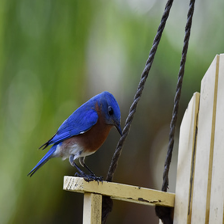

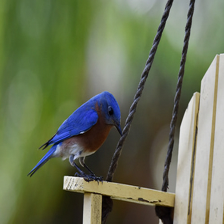

z_check [[[[558.      267.97498]
   [363.70868 254.19704]]

  [[501.9997  358.8532 ]
   [370.61154 269.98502]]]]
[[[[False False]
   [ True  True]]

  [[ True False]
   [ True False]]]]
z_check [[[[784.0001  422.2606 ]
   [429.24466 310.83884]]

  [[455.00024 378.6558 ]
   [425.11728 371.10123]]]]
[[[[ True  True]
   [False  True]]

  [[False False]
   [False  True]]]]
[0.49901015] -> [0.50265731]


In [3]:
from data import load_random_images
from add_watermark import Watermark_k_layer
from attack import attack_all
import matplotlib.pyplot as plt
from utils import draw, numpy_to_images, images_to_numpy
from examine import caculate
import numpy as np
from tqdm import tqdm
import torch
import torch.fft as fft

images_ori = load_random_images("D:/Doc/code/watermark/code/ILSVRC/Data/DET/test", 1, target_size=(224,224) ,type="RGB")
display(images_ori[0])
k = 5
images_watermark = Watermark_k_layer.modify_k_percents(images_ori, k)
display(images_watermark[0])
p0 = Watermark_k_layer.z_check(images_to_numpy(images_ori), k)
p1 = Watermark_k_layer.z_check(images_to_numpy(images_watermark), k)
print(p0, "->"  ,p1)

In [2]:
x = list(range(0,100))
x = np.array(x,dtype=np.float32)
k = 5
y = np.vectorize(Watermark_k_layer.map)(x, k)
print(y)
z = np.vectorize(Watermark_k_layer.is_green)(y, k)
print(z)
z2 = np.vectorize(Watermark_k_layer.is_green)(x, k)
print(z2)

[  0.      1.      2.      3.      4.      4.999   4.999   4.999  10.
  10.     10.     11.     12.     13.     14.     14.999  14.999  14.999
  20.     20.     20.     21.     22.     23.     24.     24.999  24.999
  24.999  30.     30.     30.     31.     32.     33.     34.     34.999
  34.999  34.999  40.     40.     40.     41.     42.     43.     44.
  44.999  44.999  44.999  50.     50.     50.     51.     52.     53.
  54.     54.999  54.999  54.999  60.     60.     60.     61.     62.
  63.     64.     64.999  64.999  64.999  70.     70.     70.     71.
  72.     73.     74.     74.999  74.999  74.999  80.     80.     80.
  81.     82.     83.     84.     84.999  84.999  84.999  90.     90.
  90.     91.     92.     93.     94.     94.999  94.999  94.999 100.
 100.   ]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  Tru